In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
sns.set_theme(style='darkgrid')


In [2]:
df = pd.read_csv('crime_data.csv', index_col=0)
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [3]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [4]:
df = remove_outliers_iqr(df, 'Rape')


In [5]:
df.shape

(48, 4)

<Axes: >

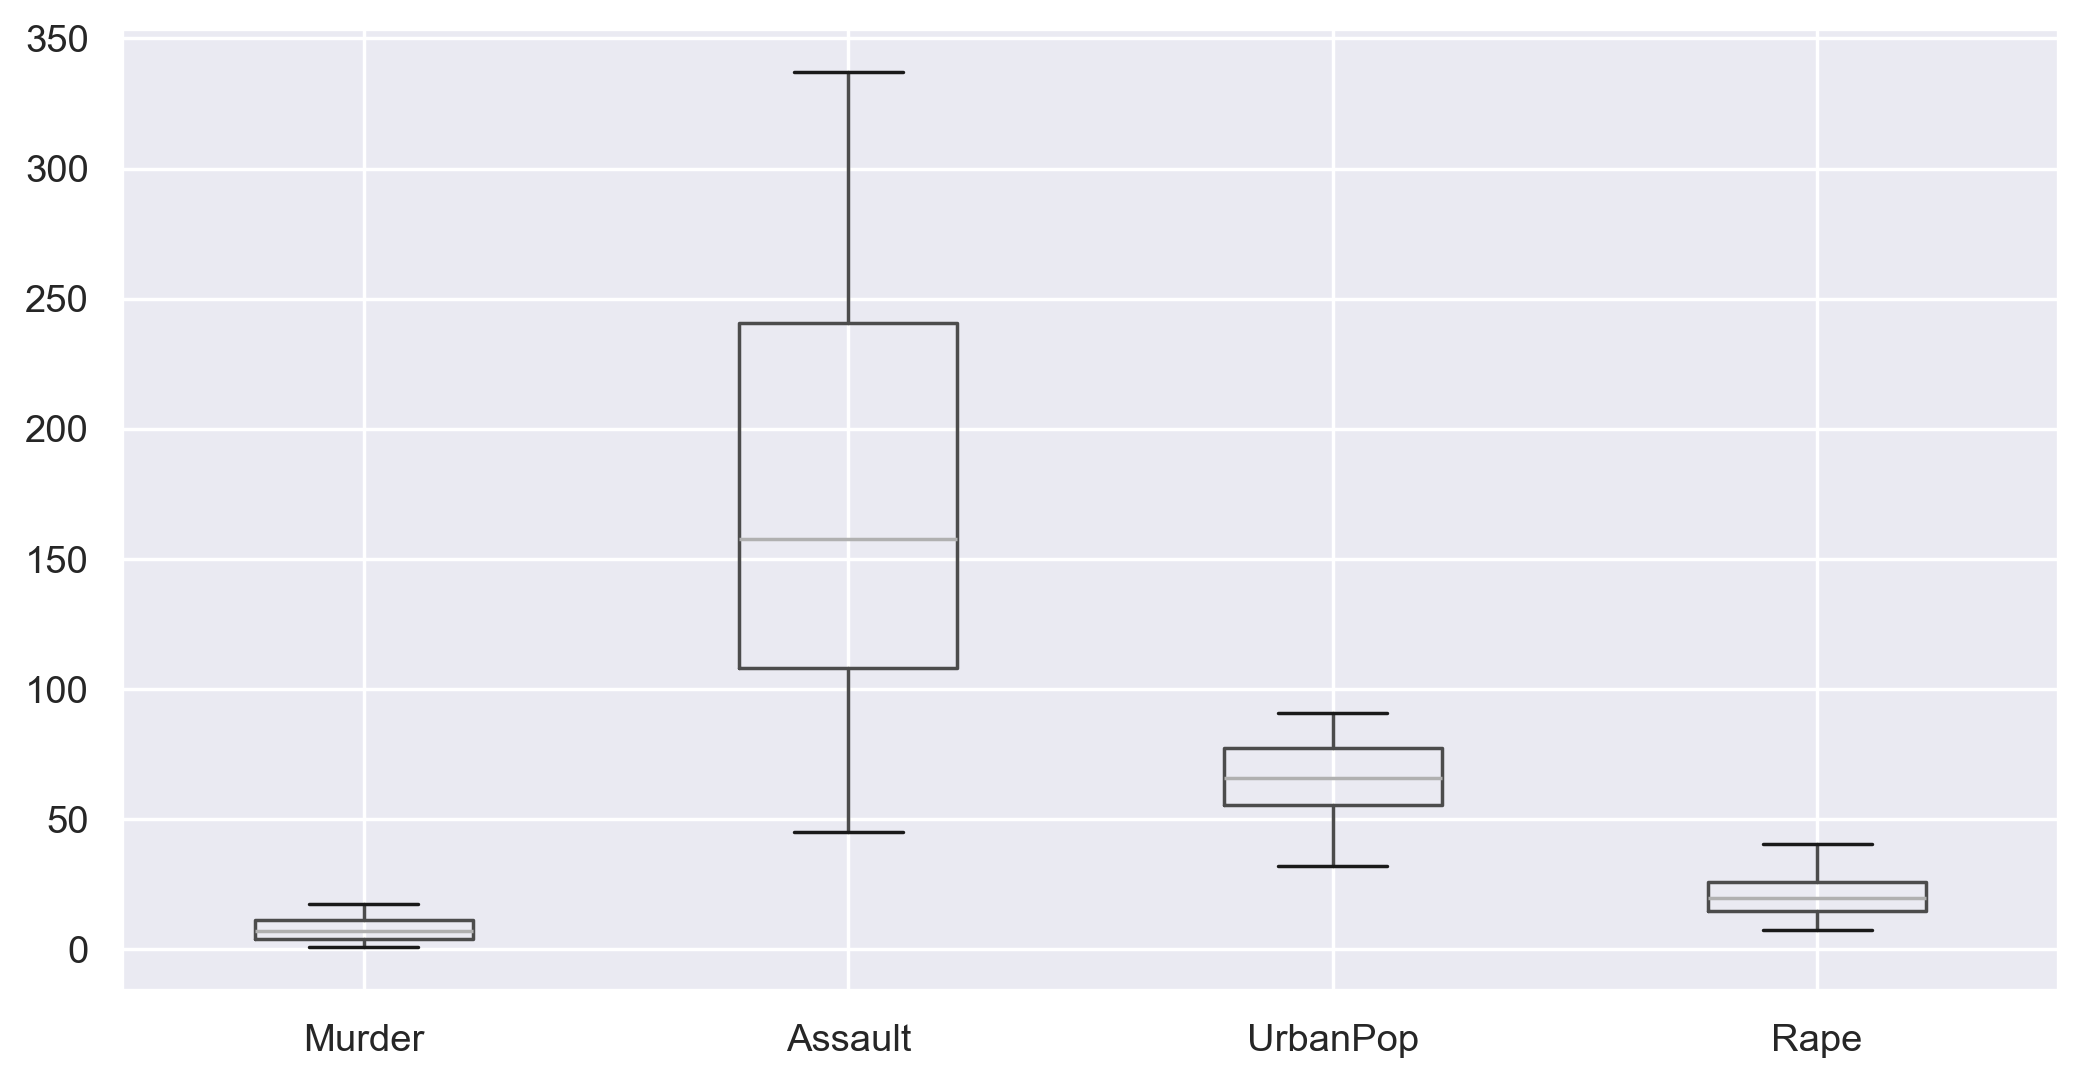

In [6]:
df.boxplot()

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [9]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[ 1.27868078,  0.83731972, -0.53291148,  0.12062732],
       [ 0.10367682,  1.54264441,  1.01311744,  1.34090882],
       [ 0.26495187,  0.27792428, -1.09510382, -0.09105417],
       [ 0.31103046,  1.32375054,  1.7861319 ,  2.53628661],
       [ 0.05759823,  0.44817506,  0.87256935,  2.29970142],
       [-1.00220926, -0.69493736,  0.80229531, -1.13700974],
       [-0.40318763,  0.86164126,  0.4509251 , -0.55177269],
       [ 1.78554524,  2.041236  ,  1.01311744,  1.45297549],
       [ 2.24633111,  0.53330046, -0.3923634 ,  0.69341251],
       [-0.5414234 , -1.47322668,  1.22393956, -0.0038912 ],
       [-1.16348432, -0.57332966, -0.81400765, -0.75100233],
       [ 0.63358057,  0.99540974,  1.22393956,  0.46927917],
       [-0.10367682, -0.65845505, -0.04099319,  0.09572361],
       [-1.25564149, -1.35161897, -0.60318553, -1.11210604],
       [-0.38014834, -0.63413351,  0.02928085, -0.27783195],
       [ 0.47230552, -0.70709814, -0.95455574, -0.48951343],
       [ 1.78554524,  0.

In [10]:
df.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [11]:
pd.DataFrame(x, columns= df.columns)

,Murder,Assault,UrbanPop,Rape
0,1.278681,0.837320,-0.532911,0.120627
1,0.103677,1.542644,1.013117,1.340909
2,0.264952,0.277924,-1.095104,-0.091054
3,0.311030,1.323751,1.786132,2.536287
4,0.057598,0.448175,0.872569,2.299701
5,-1.002209,-0.694937,0.802295,-1.137010
6,-0.403188,0.861641,0.450925,-0.551773
7,1.785545,2.041236,1.013117,1.452975
8,2.246331,0.533300,-0.392363,0.693413
9,-0.541423,-1.473227,1.223940,-0.003891


In [12]:
from scipy.cluster import hierarchy

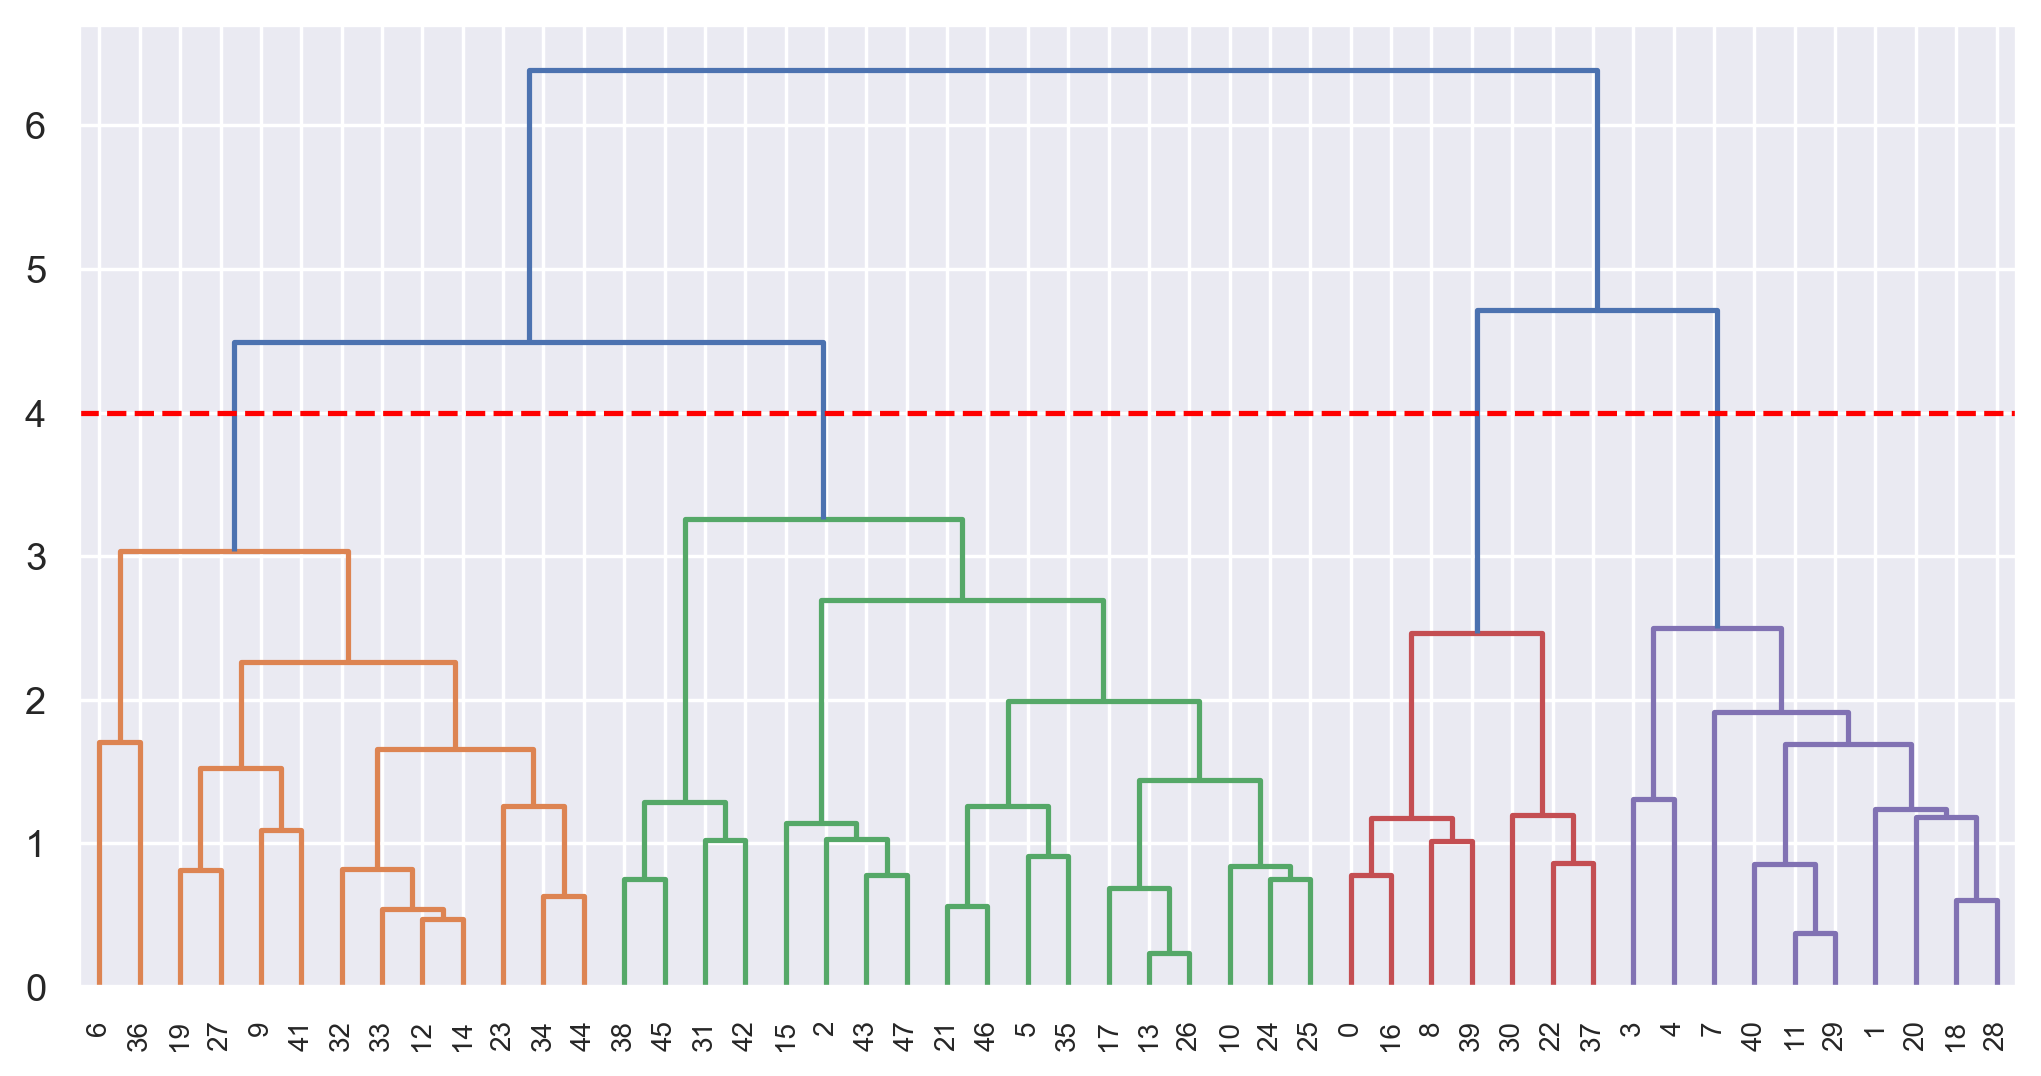

In [13]:
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 4, linestyle = '--', color = 'red')

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [16]:
hc = AgglomerativeClustering(n_clusters=4)

ypred = hc.fit_predict(x)
ypred

array([3, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1, 2,
       3, 0, 2, 2, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0, 2, 0,
       0, 2, 2, 0], dtype=int64)

In [17]:
len(ypred)

48

In [18]:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8
Hawaii,5.3,46,83,20.2


In [19]:
df['cluster'] = ypred
df

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,3
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,3
Hawaii,5.3,46,83,20.2,0


In [20]:
df[df['cluster'] == 0].mean()

Murder        6.210526
Assault     142.052632
UrbanPop     71.263158
Rape         19.184211
cluster       0.000000
dtype: float64

In [21]:
df[df['cluster'] == 1].mean()

Murder       10.94
Assault     265.30
UrbanPop     78.90
Rape         31.28
cluster       1.00
dtype: float64

In [22]:
df[df['cluster'] == 2].mean()

Murder       3.091667
Assault     76.000000
UrbanPop    52.083333
Rape        11.833333
cluster      2.000000
dtype: float64

In [23]:
df[df['cluster'] == 3].mean()

Murder       14.671429
Assault     251.285714
UrbanPop     54.285714
Rape         21.685714
cluster       3.000000
dtype: float64

In [24]:
df.groupby('cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,6.210526,142.052632,71.263158,19.184211
1,10.940000,265.300000,78.900000,31.280000
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714


In [25]:
from sklearn.metrics import silhouette_score
silhouette_score(x,ypred)

0.3435464638274459